# Introducción a Market Basket Analysis

<p align="center">
<img src ="https://banner2.cleanpng.com/20180623/bpe/kisspng-grocery-store-shopping-bags-trolleys-royalty-fre-supermarket-bag-5b2ddf3f3c0502.6807008815297329272459.jpg" width=400>
</p>

Algoritmo que usa reglas de asociación para determinar que artículos se compran de manera conjunta con mayor frecuencia

**Datos:**

http://archive.ics.uci.edu/ml/datasets/online+retail

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
import requests
url="https://raw.githubusercontent.com/edavgaun/Python_Intermedio/master/Datasets/Market_Basket_Optimisation.csv"
web=requests.get(url)

In [198]:
compras=web.text.splitlines()

In [199]:
compras[1]

'burgers,meatballs,eggs'

In [200]:
items=[]
for usuario in compras:
  for articulo in usuario.split(","):
    if articulo not in items:
      items.append(articulo)

In [201]:
len(items)

120

In [202]:
print(items)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'milk', 'energy bar', 'whole wheat rice', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'pet food', 'cookies', 'cooking oil', 'champagne', 'chocolate', 'chicken', 'oil', 'fresh tuna', 'tomatoes', 'black tea', 'extra dark chocolate', 'protein bar', 'red wine', 'pasta', 'pepper', 'shampoo', 'rice', 'sparkling water', 'ham', 'body spray', 'pancakes', 'grated cheese', 'white wine', 'toothpaste', 'parmesan cheese', 'fresh bread', 'ground beef', 'escalope', 'herb & pepper', 'tomato sauce', 'magazines', 'strawberries', 'strong cheese', 'pickles', 'cake', 'hot dogs', 'brownies', 'cereals', 'clothes acces

In [203]:
tabla=pd.DataFrame(columns=items)

In [204]:
tabla

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,burgers,meatballs,eggs,chutney,turkey,milk,energy bar,whole wheat rice,whole wheat pasta,french fries,soup,light cream,shallot,frozen vegetables,spaghetti,pet food,cookies,cooking oil,champagne,chocolate,...,corn,yogurt cake,mint,butter,asparagus,french wine,salt,tea,barbecue sauce,mayonnaise,zucchini,carrots,mushroom cream sauce,candy bars,chili,mashed potato,nonfat milk,water spray,chocolate bread,mint green tea,eggplant,blueberries,bacon,fromage blanc,gluten free bar,dessert wine,flax seed,hand protein bar,sandwich,babies food,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins


In [205]:
for n in range(len(compras)):
  for item in compras[n].split(","):
    tabla.loc[n,item]=1

In [206]:
tabla

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil,burgers,meatballs,eggs,chutney,turkey,milk,energy bar,whole wheat rice,whole wheat pasta,french fries,soup,light cream,shallot,frozen vegetables,spaghetti,pet food,cookies,cooking oil,champagne,chocolate,...,corn,yogurt cake,mint,butter,asparagus,french wine,salt,tea,barbecue sauce,mayonnaise,zucchini,carrots,mushroom cream sauce,candy bars,chili,mashed potato,nonfat milk,water spray,chocolate bread,mint green tea,eggplant,blueberries,bacon,fromage blanc,gluten free bar,dessert wine,flax seed,hand protein bar,sandwich,babies food,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [228]:
tabla.fillna(0, inplace=True)

In [231]:
tabla.sum(axis=1)

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

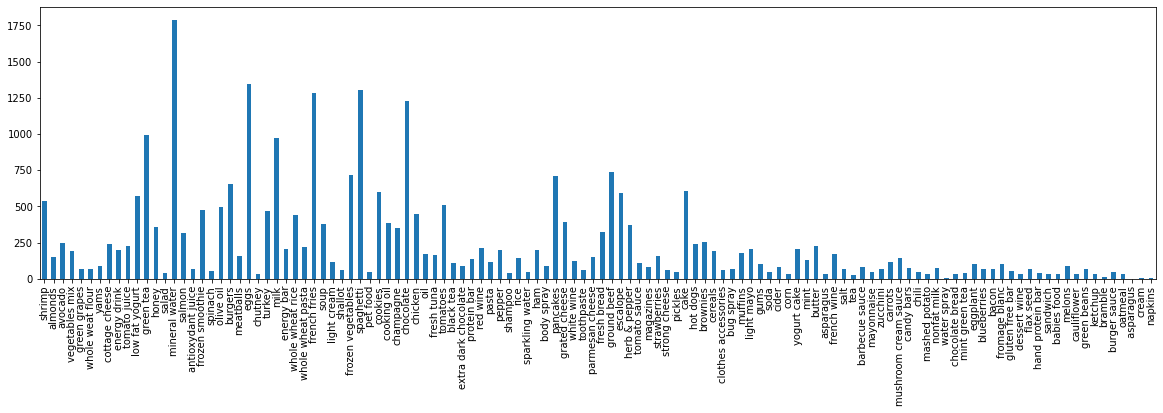

In [229]:
tabla.sum().plot(kind="bar", figsize=(20,5))
plt.show()

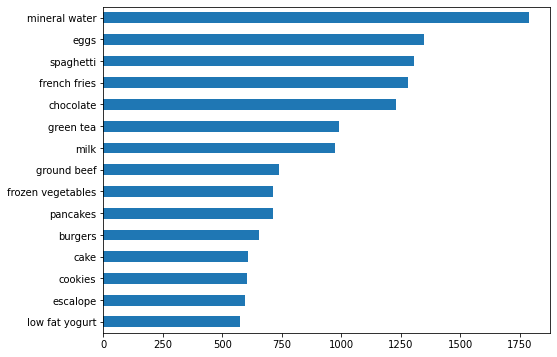

In [238]:
tabla.sum().sort_values(ascending=False)[:15].plot(kind="barh", figsize=(8,6))
plt.gca().invert_yaxis()
plt.show()

In [278]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [301]:
def support(df, columna):
  return df[columna].sum() / df.shape[0]

In [302]:
support(tabla,"low fat yogurt")

0.07652313024930009

In [315]:
apriori(tabla, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.071457,(shrimp)
1,0.076523,(low fat yogurt)
2,0.132116,(green tea)
3,0.238368,(mineral water)
4,0.063325,(frozen smoothie)
5,0.065858,(olive oil)
6,0.087188,(burgers)
7,0.179709,(eggs)
8,0.062525,(turkey)
9,0.129583,(milk)


In [316]:
frequent_items=apriori(tabla, min_support=0.05, use_colnames=True)

In [323]:
# Creando las reglas de asociación:
rules=association_rules(frequent_items, metric="lift",)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
